In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# loading the dataset using pandas

data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [39]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Visualizing the dataframe

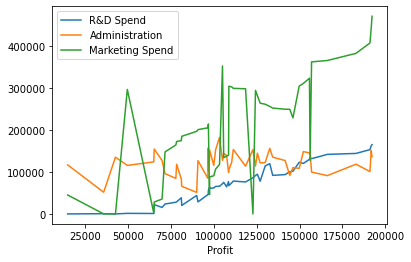

In [3]:
data.plot(x="Profit", y=["R&D Spend", "Administration", "Marketing Spend"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

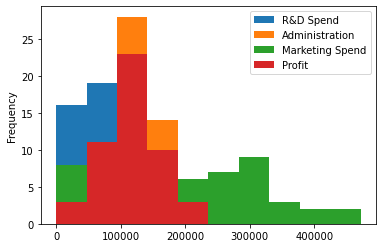

In [4]:
data.plot(kind='hist')

## checking for Correlation

<AxesSubplot:xlabel='Profit', ylabel='R&D Spend'>

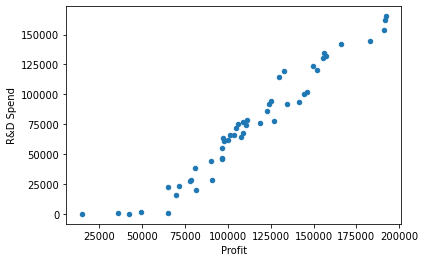

In [5]:
data.plot(x='Profit',y='R&D Spend', kind='scatter')

<AxesSubplot:xlabel='Profit', ylabel='Administration'>

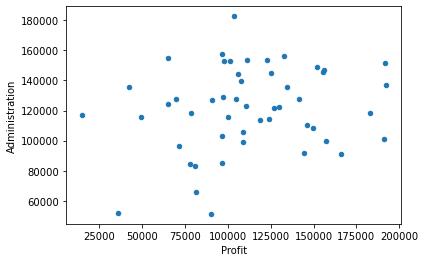

In [6]:
data.plot(x='Profit',y='Administration', kind='scatter')

<AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>

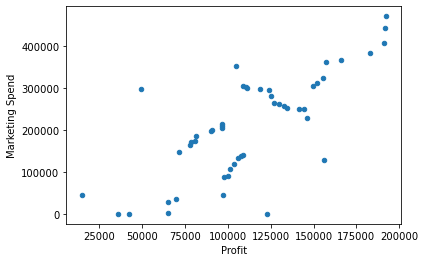

In [7]:
data.plot(x='Profit',y='Marketing Spend', kind='scatter')

## Scaling and Splitting the dataset

In [8]:
# Splitting the data into features and labels

x = data.drop('Profit', axis=1)  #features
y = data.Profit                  #labels

# Scaling the data using StandardScaler before applying regression algorithms
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [9]:
# Splitting the data into training and testing set using train_test_Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y, test_size=0.2, random_state=21)

In [10]:
# Converting into numpy arrays

x_train =np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# APPLYING REGRESSION ALGORITHMS

In [11]:
# Importing Evaluation metrices

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score

## LINEAR REGRESSION

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(x_train,y_train)
y_pred_reg = reg.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_reg))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_reg))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_reg))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_reg))
print('max_error:',max_error(y_test, y_pred_reg))
print('explained_variance_score:',explained_variance_score(y_test, y_pred_reg))
reg.score(x_test, y_test)

r2_score: 0.9658747497132996
mean_absolute_error: 5912.410683972493
mean_squared_error: 60563681.1063965
mean_squared_log_error: 0.005440873357421517
max_error: 18275.380249433772
explained_variance_score: 0.9669037542256351


0.9658747497132996

## RIDGE REGRESSION

In [13]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=.5)

rid.fit(x_train,y_train)
y_pred_rid = rid.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_rid))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_rid))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_rid))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_rid))
print('max_error:',max_error(y_test, y_pred_rid))
print('explained_variance_score:',explained_variance_score(y_test, y_pred_rid))

rid.score(x_test, y_test)

r2_score: 0.9659490034384169
mean_absolute_error: 6045.635616587119
mean_squared_error: 60431899.54021923
mean_squared_log_error: 0.005509444257690543
max_error: 17886.83717910372
explained_variance_score: 0.9670581826801208


0.9659490034384169

## Stochastic Gradient Descent

In [14]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

sgd.fit(x_train, y_train)
y_pred_sgd =  sgd.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_sgd))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_sgd))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_sgd))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_sgd))                                                    
print('max_error:',max_error(y_test, y_pred_sgd))
                             
print('explained_variance_score:',explained_variance_score(y_test, y_pred_sgd))

sgd.score(x_test, y_test)

r2_score: 0.9658243169513142
mean_absolute_error: 5936.562675059979
mean_squared_error: 60653186.49283413
mean_squared_log_error: 0.0054557783110263025
max_error: 18226.277877468703
explained_variance_score: 0.9668587688797976


0.9658243169513142

## RANDOM FOREST

In [15]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2,random_state=0)

regr.fit(x_train, y_train)
y_pred_regr = regr.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_regr))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_regr))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_regr))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_regr))
print('max_error:',max_error(y_test, y_pred_regr))
print('explained_variance_score:',explained_variance_score(y_test, y_pred_regr))

regr.score(x_test, y_test)

r2_score: 0.9339275285069357
mean_absolute_error: 9898.896327121965
mean_squared_error: 117261911.92147665
mean_squared_log_error: 0.012274337749154781
max_error: 15589.249342461611
explained_variance_score: 0.9369511707774676


0.9339275285069357

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)

dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_dtr))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_dtr))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_dtr))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_dtr))
print('max_error:',max_error(y_test, y_pred_dtr))
print('explained_variance_score:',explained_variance_score(y_test, y_pred_dtr))

dtr.score(x_test, y_test)

r2_score: 0.9669314460457668
mean_absolute_error: 5867.402800000003
mean_squared_error: 58688312.59867342
mean_squared_log_error: 0.006674337988918017
max_error: 18383.214999999997
explained_variance_score: 0.9670650546607749


0.9669314460457668

## Xgboost

In [19]:
import xgboost as xg
xgb = xg.XGBRegressor(objective='reg:linear',n_estimators=10, seed=123)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_xgb))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_xgb))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_xgb))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_xgb))
print('max_error:',max_error(y_test, y_pred_xgb))
print('explained_variance_score:',explained_variance_score(y_test, y_pred_xgb))

xgb.score(x_test, y_test)

[16:20:52] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
r2_score: 0.9065323404608379
mean_absolute_error: 10748.275558593752
mean_squared_error: 165881436.13695917
mean_squared_log_error: 0.10907490328518624
max_error: 27036.471210937503
explained_variance_score: 0.9189452996108837


0.9065323404608379

## Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 1)

gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

print('r2_score:',r2_score(y_test, y_pred_gbr))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_gbr))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_gbr))
print('mean_squared_log_error:',mean_squared_log_error(y_test, y_pred_gbr))
print('max_error:',max_error(y_test, y_pred_gbr))
print('explained_variance_score:',explained_variance_score(y_test, y_pred_gbr))

gbr.score(x_test, y_test)

r2_score: 0.9300039372876133
mean_absolute_error: 9061.28803856215
mean_squared_error: 124225293.15392172
mean_squared_log_error: 0.06372817366448633
max_error: 22704.894079956455
explained_variance_score: 0.9302095424708565


0.9300039372876133